In [30]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [31]:
df = pd.read_csv("teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [33]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

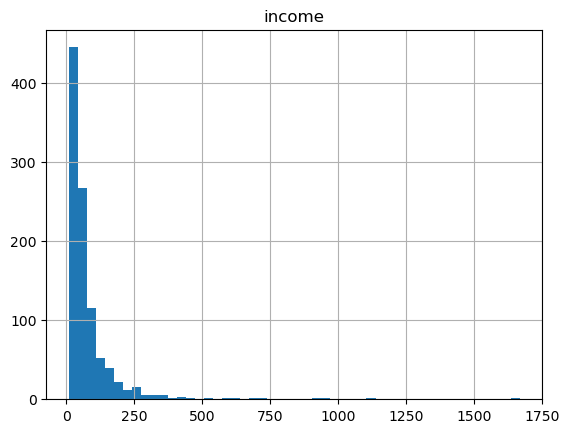

In [34]:
df.hist(column='income', bins=50)

In [35]:
x= df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x)
x = sc.transform(x)



array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_true = train_test_split(x ,y, test_size=0.2, random_state=4)
X_train.shape
X_test.shape

(200, 11)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

k_range = range(1,10)
cm_score = []
for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)
    myModel = knn.fit(X_train, y_train)

    y_pred = myModel.predict(X_test)



    cm = confusion_matrix(y_true, y_pred)
    cm_score.append( knn.score(X_test,y_true))

cm_score

[0.3, 0.29, 0.315, 0.32, 0.315, 0.31, 0.335, 0.325, 0.34]

C:\Users\krujo\AppData\Local\Temp\ipykernel_16680\3576915040.py:2: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('accuracy',"Data sets")


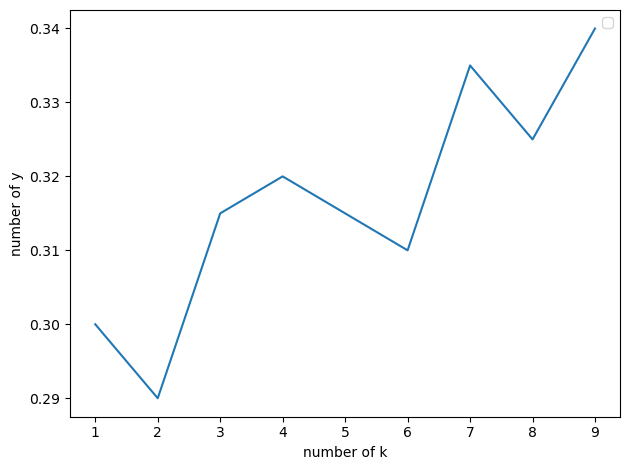

In [59]:
plt.plot(k_range, cm_score)
plt.legend('accuracy',"Data sets")
plt.xlabel('number of k')
plt.ylabel('number of y')
plt.tight_layout()
plt.show()